In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import shutil
import math
import imutils
import cv2

In [34]:
root_dir = r'brain_tumour_healthy\Brain Tumor Data Set\Brain Tumor Data Set'

num_of_images = {}

for i in os.listdir(root_dir):
    num_of_images[i] = len(os.listdir(os.path.join(root_dir , i)))
        
num_of_images

{'Brain Tumor': 2513, 'Healthy': 2087}

In [ ]:
if not os.path.exists(root_dir+'\\train'):
    os.mkdir(root_dir+'\\train')
    
    for dirty in os.listdir(root_dir):
        if (dirty == 'train') | (dirty=='test'):
            pass
        else:
            os.mkdir(root_dir+'\\train/'+dirty)
            for img in np.random.choice(a = os.listdir(os.path.join(root_dir,dirty)),
                                       size = (math.floor(70/100*num_of_images[dirty])-5) , replace = False):
                src = os.path.join(root_dir,dirty, img)
                dest = os.path.join(root_dir+'\\train', dirty)
                shutil.copy(src , dest)
                os.remove(src)
else:
    print("Train Folder Exists")

In [38]:
if not os.path.exists(root_dir+'\\test'):
    os.mkdir(root_dir+'\\test')
    
    for dirty in os.listdir(root_dir):
        if (dirty == 'train') | (dirty=='test'):
            pass
        else:
            os.mkdir(root_dir+'\\test/'+dirty)
            for img in np.random.choice(a = os.listdir(os.path.join(root_dir,dirty)),
                                       size = (math.floor(15/100*num_of_images[dirty])-5) , replace = False):
                src = os.path.join(root_dir,dirty, img)
                dest = os.path.join(root_dir+'\\test', dirty)
                shutil.copy(src , dest)
                os.remove(src)
else:
    print("Test Folder Exists")

In [49]:
if not os.path.exists(root_dir+'\\val'):
    os.mkdir(root_dir+'\\val')
    
    for dirty in os.listdir(root_dir):
        if (dirty == 'train') | (dirty=='test') | (dirty == 'val'):
            pass
        else:
            os.mkdir(root_dir+'\\val/'+dirty)
            for img in np.random.choice(a = os.listdir(os.path.join(root_dir,dirty)),
                                       size = (math.floor(15/100*num_of_images[dirty])-5) , replace = False):
                src = os.path.join(root_dir,dirty, img)
                dest = os.path.join(root_dir+'\\val', dirty)
                shutil.copy(src , dest)
                os.remove(src)
else:
    print("Val Folder Exists")

In [40]:
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout,BatchNormalization,MaxPooling2D,GlobalAvgPool2D
from keras.preprocessing import image
from keras.models import Sequential
import keras

## CNN MODEL

In [62]:
model = Sequential()
model.add(Conv2D(filters = 16,kernel_size = (3,3) , activation = 'relu', input_shape = (224,224,3)))

model.add(Conv2D(filters = 32,kernel_size = (3,3) , activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64,kernel_size = (3,3) , activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 128,kernel_size = (3,3) , activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Dropout(rate = 0.25))

model.add(Flatten())
model.add(Dense(units = 64 , activation = 'relu'))
model.add(Dropout(rate = 0.25))
model.add(Dense(units = 1,activation = 'sigmoid'))

In [63]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 222, 222, 16)      448       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 220, 220, 32)      4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 108, 108, 64)      18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 26, 26, 128)      

In [64]:
model.compile(loss= keras.losses.binary_crossentropy , optimizer = 'adam' , metrics = ['accuracy'])

In [51]:
train_datagen = image.ImageDataGenerator(
                zoom_range = 0.2, shear_range = 0.2, rescale = 1./255 , horizontal_flip = True
)

val_datagen = image.ImageDataGenerator(rescale = 1./255)
test_datagen = image.ImageDataGenerator(rescale = 1./255)

In [52]:
train_data = train_datagen.flow_from_directory(directory = r'brain_tumour_healthy\Brain Tumor Data Set\Brain Tumor Data Set\train',
                                              target_size = (224,224) , batch_size = 32 , class_mode = 'binary')

Found 3209 images belonging to 2 classes.


In [53]:
val_data = val_datagen.flow_from_directory(directory = r'brain_tumour_healthy\Brain Tumor Data Set\Brain Tumor Data Set\val',
                                              target_size = (224,224) , batch_size = 32 , class_mode = 'binary')

Found 679 images belonging to 2 classes.


In [54]:
test_data = test_datagen.flow_from_directory(directory = r'brain_tumour_healthy\Brain Tumor Data Set\Brain Tumor Data Set\test',
                                              target_size = (224,224) , batch_size = 32 , class_mode = 'binary')

Found 679 images belonging to 2 classes.


In [56]:
from keras.callbacks import ModelCheckpoint , EarlyStopping

In [65]:
es = EarlyStopping(monitor= 'val_accuracy', min_delta = 0.01, patience = 5,verbose = 1 , mode = 'auto')

mc = ModelCheckpoint(filepath = 'braintumour_best_model.h5' , monitor= 'val_accuracy', min_delta = 0.01, patience = 5,verbose = 1 ,
                     mode = 'auto', save_best_only = True)

callback = [es,mc]

In [ ]:
### Did two times == 30 epochs

In [66]:
hist = model.fit_generator(generator = train_data , steps_per_epoch = 8 ,epochs = 30 , verbose = 1, validation_data = val_data,
                          validation_steps = 16 , callbacks = callback) 

Epoch 1/30
8/8 [==============================] - 19s 2s/step - loss: 0.7500 - accuracy: 0.5547 - val_loss: 0.6760 - val_accuracy: 0.5430

Epoch 00001: val_accuracy improved from -inf to 0.54297, saving model to braintumour_best_model.h5
Epoch 2/30
8/8 [==============================] - 16s 2s/step - loss: 0.6909 - accuracy: 0.5469 - val_loss: 0.6814 - val_accuracy: 0.5645

Epoch 00002: val_accuracy improved from 0.54297 to 0.56445, saving model to braintumour_best_model.h5
Epoch 3/30
8/8 [==============================] - 15s 2s/step - loss: 0.6921 - accuracy: 0.5039 - val_loss: 0.6410 - val_accuracy: 0.6250

Epoch 00003: val_accuracy improved from 0.56445 to 0.62500, saving model to braintumour_best_model.h5
Epoch 4/30
8/8 [==============================] - 15s 2s/step - loss: 0.6699 - accuracy: 0.5859 - val_loss: 0.5893 - val_accuracy: 0.6680

Epoch 00004: val_accuracy improved from 0.62500 to 0.66797, saving model to braintumour_best_model.h5
Epoch 5/30
8/8 [=======================

In [67]:
from keras.models import load_model

model= load_model(r'braintumour_best_model.h5')

In [68]:
model.evaluate_generator(generator = test_data)

[0.46641474962234497, 0.815905749797821]

In [69]:
acc =  model.evaluate_generator(generator = test_data)[1]

print(f"the accuracy of the modelis = {acc*100}%")

the accuracy of the modelis = 81.5905749797821%


In [70]:
h = hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

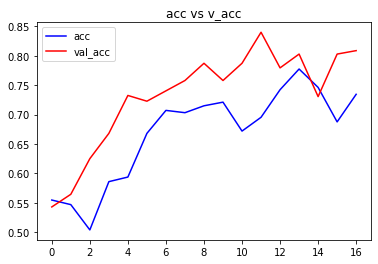

In [74]:
plt.plot(h['accuracy'], c = 'blue', label = 'acc')
plt.plot(h['val_accuracy'],c = 'red' , label = 'val_acc')
plt.title('acc vs v_acc')
plt.legend()
plt.show()

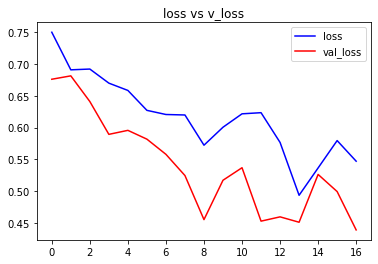

In [75]:
plt.plot(h['loss'],c = 'blue',label = 'loss')
plt.plot(h['val_loss'],c = 'red' , label = 'val_loss')
plt.title('loss vs v_loss')
plt.legend()
plt.show()

In [76]:
path = r'brain_tumour_healthy\Brain Tumor Data Set\Brain Tumor Data Set\train\Healthy\Not Cancer  (20).jpg'
img = image.load_img(path , target_size = (224,224),)

i = image.img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

(1, 224, 224, 3)

In [80]:
model.predict(input_arr)[0][0]

0.6229524

In [88]:
pred = model.predict(input_arr)[0][0]
pred

0.6229524

In [90]:
if pred<0.5:
    print("He has cancer")
else:
    print("He is healthy")

He is healthy
